In [4]:
import numpy as np 
import pandas as pd
from sklearn import model_selection
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("income_evaluation.csv")
#featureData= np.array(dataset.iloc[:, :-1])
#classData= np.array(dataset.iloc[:, -1])

#print(featureData[:50])
#print(classData[:50])
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

dataset.columns = col_names
dataset.head()


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


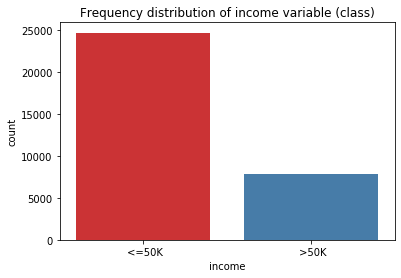

In [5]:
#frequency distribution of income variable
freqplt = sns.countplot(x="income", data=dataset, palette="Set1")
freqplt.set_title("Frequency distribution of income variable (class)")

plt.show();

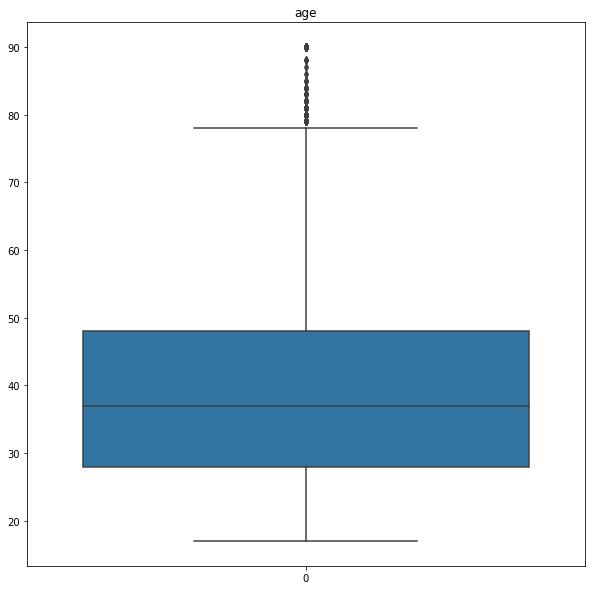

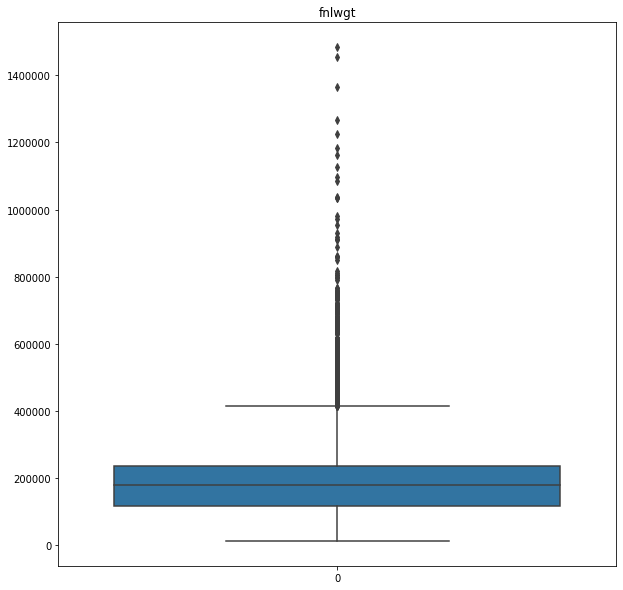

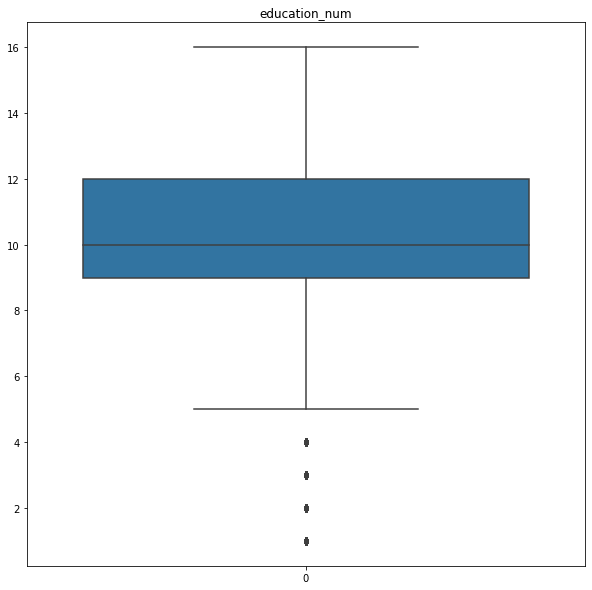

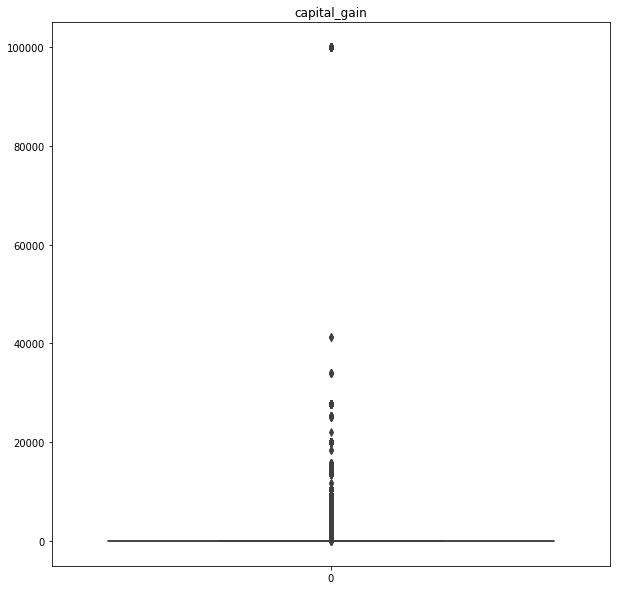

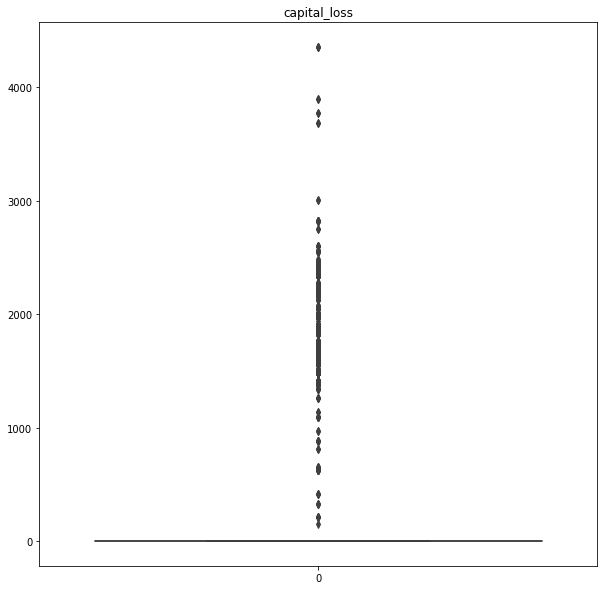

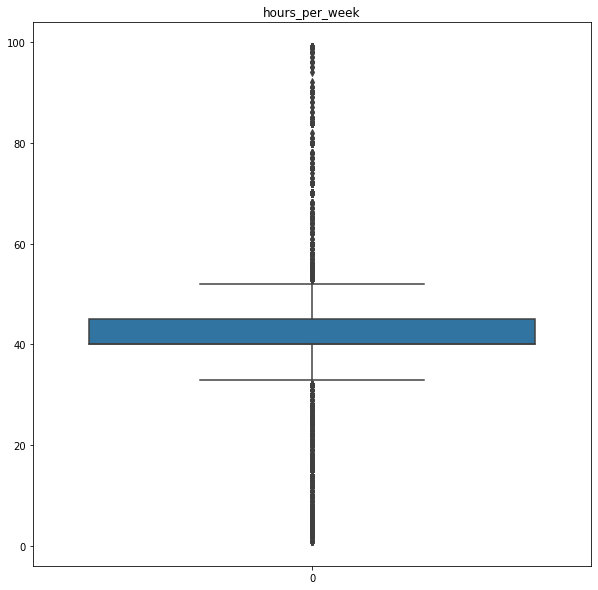

In [7]:
categoricalFeatures = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']
numericalFeatures = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

for i in numericalFeatures:
    plt.figure(figsize=(10, 10))
    sns.boxplot(data= dataset[i]).set_title(i)
    plt.show();

In [8]:

for i in categoricalFeatures:
    print("unique values in column: ", i)
    print(dataset[i].unique())
    print('\n')

unique values in column:  workclass
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']


unique values in column:  education
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']


unique values in column:  marital_status
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']


unique values in column:  occupation
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']


unique values in column:  relationship
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']


unique values in column:

In [9]:
dataset = dataset.replace(' ?', np.NaN)

print(dataset.isnull().sum())
dataset.shape

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64


(32561, 15)

In [5]:
#from sklearn.impute import SimpleImputer

#imputer = ColumnTransformer( [ ('imp', SimpleImputer(strategy = "most_frequent"), ['workclass','occupation','native_country'])], remainder='passthrough')
#imputedf = imputer.fit_transform(dataset)

#imputedf

In [10]:
imputedf = dataset.copy()

imputedf['workclass'] = imputedf['workclass'].fillna(imputedf['workclass'].mode()[0])
imputedf['occupation'] = imputedf['occupation'].fillna(imputedf['occupation'].mode()[0])
imputedf['native_country'] = imputedf['native_country'].fillna(imputedf['native_country'].mode()[0])
imputedf.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [11]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer

featureData = imputedf.iloc[:,:-1]
classData = imputedf.iloc[:,-1]

preprocessor= ColumnTransformer( transformers = [('cat1', OneHotEncoder(sparse="False", categories='auto'), categoricalFeatures),
                                                    ('scl', MinMaxScaler(), numericalFeatures)], remainder='passthrough')
transformedData= preprocessor.fit_transform(featureData).toarray()

classData = np.array(classData.map({' <=50K':0, ' >50K':1}))

print(transformedData)
print(classData.shape)



[[0.         0.         0.         ... 0.02174022 0.         0.39795918]
 [0.         0.         0.         ... 0.         0.         0.12244898]
 [0.         0.         0.         ... 0.         0.         0.39795918]
 ...
 [0.         0.         0.         ... 0.         0.         0.39795918]
 [0.         0.         0.         ... 0.         0.         0.19387755]
 [0.         0.         0.         ... 0.1502415  0.         0.39795918]]
(32561,)


In [13]:
train_features, test_features, train_labels, test_labels= model_selection.train_test_split(transformedData, classData, test_size=0.3, random_state=0)

print(train_features.shape)
print(test_features.shape)


(22792, 105)
(9769, 105)


(34626, 105)


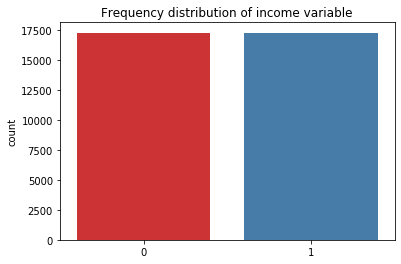

In [14]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=0)
train_features, train_labels = sm.fit_sample(train_features, train_labels)

print(train_features.shape)


#frequency distribution of income variable
freqplt = sns.countplot(x=train_labels, palette="Set1")
freqplt.set_title("Frequency distribution of income variable")

plt.show();

In [15]:
clf= tree.DecisionTreeClassifier()
clf= clf.fit(train_features, train_labels)

# predict the class for an unseen example
results= clf.predict(test_features)
print  ('Accuracy', metrics.accuracy_score(results, test_labels))

cf_mat= confusion_matrix(y_true=test_labels, y_pred=results)
print('Confusion matrix:\n', cf_mat)

Accuracy 0.8028457365134609
Confusion matrix:
 [[6309 1098]
 [ 828 1534]]


In [41]:
#scores = model_selection.cross_val_score(clf, train_features, train_labels, cv=10)
#print (scores.mean())

In [16]:
from sklearn.svm import LinearSVC

clf= LinearSVC(random_state=0)
clf= clf.fit(train_features, train_labels)

# predict the class for an unseen example
results= clf.predict(test_features)
print  (metrics.accuracy_score(results, test_labels))

cf_mat= confusion_matrix(y_true=test_labels, y_pred=results)
print('Confusion matrix:\n', cf_mat)

0.8047906643464019
Confusion matrix:
 [[5840 1567]
 [ 340 2022]]


In [17]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=0)
clf= clf.fit(train_features, train_labels)

# predict the class for an unseen example
results= clf.predict(test_features)
print  (metrics.accuracy_score(results, test_labels))

cf_mat= confusion_matrix(y_true=test_labels, y_pred=results)
print('Confusion matrix:\n', cf_mat)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8313031016480704
Confusion matrix:
 [[6568  839]
 [ 809 1553]]


In [22]:
from sklearn.svm import SVC

clf = SVC(gamma='auto')
clf= clf.fit(train_features, train_labels)

# predict the class for an unseen example
results= clf.predict(test_features)
print  (metrics.accuracy_score(results, test_labels))

cf_mat= confusion_matrix(y_true=test_labels, y_pred=results)
print('Confusion matrix:\n', cf_mat)

0.7681441293888832
Confusion matrix:
 [[5532 1875]
 [ 390 1972]]


In [18]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf= clf.fit(train_features, train_labels)

# predict the class for an unseen example
results= clf.predict(test_features)
print  (metrics.accuracy_score(results, test_labels))

cf_mat= confusion_matrix(y_true=test_labels, y_pred=results)
print('Confusion matrix:\n', cf_mat)

0.7604667826799059
Confusion matrix:
 [[5459 1948]
 [ 392 1970]]


In [19]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf= clf.fit(train_features, train_labels)

# predict the class for an unseen example
results= clf.predict(test_features)
print  (metrics.accuracy_score(results, test_labels))

cf_mat= confusion_matrix(y_true=test_labels, y_pred=results)
print('Confusion matrix:\n', cf_mat)

0.7651755553280786
Confusion matrix:
 [[5650 1757]
 [ 537 1825]]


In [20]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf= clf.fit(train_features, train_labels)

# predict the class for an unseen example
results= clf.predict(test_features)
print  (metrics.accuracy_score(results, test_labels))

cf_mat= confusion_matrix(y_true=test_labels, y_pred=results)
print('Confusion matrix:\n', cf_mat)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8075545091616337
Confusion matrix:
 [[5878 1529]
 [ 351 2011]]


In [21]:
from sklearn.linear_model import RidgeClassifier

clf = RidgeClassifier()
clf= clf.fit(train_features, train_labels)

# predict the class for an unseen example
results= clf.predict(test_features)
print  (metrics.accuracy_score(results, test_labels))

cf_mat= confusion_matrix(y_true=test_labels, y_pred=results)
print('Confusion matrix:\n', cf_mat)

0.779301873272597
Confusion matrix:
 [[5597 1810]
 [ 346 2016]]
